# 图像修补

### 目标
在本章中，
- 我们将学习如何通过一种称为“修复”的方法消除旧照片中的小噪音，笔画等。
- 我们将看到OpenCV中的修复功能。

### 基础
你们大多数人家里都会有一些旧的旧化照片，上面有黑点，一些笔触等。你是否曾经想过将其还原？我们不能简单地在绘画工具中擦除它们，因为它将简单地用白色结构代替黑色结构，这是没有用的。在这些情况下，将使用一种称为图像修复的技术。基本思想很简单：用附近的像素替换那些不良区域，使其看起来和邻近的协调。考虑下面显示的图像（摘自Wikipedia）：

![](data/inpaint_basics.jpg)

基于此目的设计了几种算法，OpenCV提供了其中两种。
两者都可以通过相同的函数进行访问，**cv.inpaint**()

第一种算法基于Alexandru Telea在2004年发表的论文“基于快速行进方法的图像修补技术”。它基于快速行进方法。考虑图像中要修复的区域。算法从该区域的边界开始，并进入该区域内部，首先逐渐填充边界中的所有内容。在要修复的邻域上的像素周围需要一个小的邻域。该像素被附近所有已知像素的归一化加权总和所代替。权重的选择很重要。那些位于该点附近，边界法线附近的像素和那些位于边界轮廓线上的像素将获得更大的权重。修复像素后，将使用快速行进方法将其移动到下一个最近的像素。FMM确保首先修复已知像素附近的那些像素，以便像手动启发式操作一样工作。通过使用标志**cv.INPAINT_TELEA**启用此算法。

第二种算法基于Bertalmio，Marcelo，Andrea L. Bertozzi和Guillermo Sapiro在2001年发表的论文“ Navier-Stokes，流体动力学以及图像和视频修补”。该算法基于流体动力学并利用了 偏微分方程。基本原理是启发式的。它首先沿着边缘从已知区域移动到未知区域（因为边缘是连续的）。它延续了等距线（线连接具有相同强度的点，就像轮廓线连接具有相同高程的点一样），同时在修复区域的边界匹配梯度矢量。为此，使用了一些流体动力学方法。获得它们后，将填充颜色以减少该区域的最小差异。通过使用标志**cv.INPAINT_NS**启用此算法。

### 代码
我们需要创建一个与输入图像大小相同的掩码，其中非零像素对应于要修复的区域。其他一切都很简单。我的图像因一些黑色笔画而旧化（我手动添加了）。我使用“绘画”工具创建了相应的笔触。

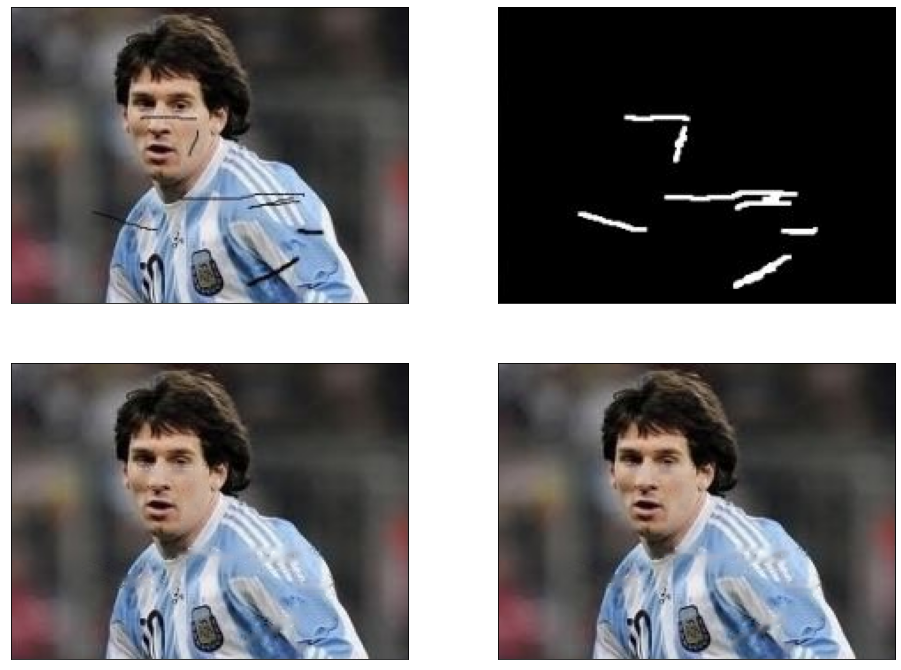

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/messi_2.jpg')

mask = cv.imread('data/mask2.png',0)

dst1 = cv.inpaint(img,mask,3,cv.INPAINT_TELEA)
dst2 = cv.inpaint(img,mask,3,cv.INPAINT_NS)

plt.figure(figsize=(16,12))

plt.subplot(221), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(cv.cvtColor(mask, cv.COLOR_GRAY2RGB))
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.show()

请参阅上面的结果。第一张图片显示了降级的输入。第二个图像是掩码。第三个图像是第一个算法的结果，最后一个图像是第二个算法的结果。

 ### 附加资源
1. Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro. "Navier-stokes, fluid dynamics, and image and video inpainting." In Computer Vision and Pattern Recognition, 2001. CVPR 2001. Proceedings of the 2001 IEEE Computer Society Conference on, vol. 1, pp. I-355. IEEE, 2001.
2. Telea, Alexandru. "An image inpainting technique based on the fast marching method." Journal of graphics tools 9.1 (2004): 23-34.

### 练习
1. OpenCV一个有关修复的交互式示例，samples/python/inpaint.py，请尝试一下。
2. 几个月前，我观看了有关Content-Aware Fill的视频，Content-Aware Fill是Adobe Photoshop中使用的一种先进的修复技术。在进一步的搜索中，我发现GIMP中已经存在相同的技术，但名称不同，为“ Resynthesizer”（你需要安装单独的插件）。我相信你会喜欢这项技术的。
